## Exercises
1. Use the np.log() function to log the values of RGDP per capita. Create a lag for this new variable and rerun the regression using these new logged values as well as untransformed Economic Freedom Index Values (don't log these variables!). (hint: you may reimport the csv file).
2. Plot the residuals in a bar chart. Explain why the shape of the distribution of these residuals are distinct from the shape of the residuals plotted in the first regression from this lesson.
3. Plot a scatter plot with RGDP Per Capita on the horizontal axis and the predictor on the vertical axis. Then plot a scatter plot with RGDP Per Capita on the horizontal axis and the residual on the vertical axis. Are the residuals normally distributed? Why or why not? Why does this matter?
4. Plot the observed and predicted logged values of RGDP Per Capita for each individual country.

In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

data_original = pd.read_csv("fraserDataWithRGDPPC.csv", 
                   index_col=[0,1],
                  parse_dates = True)
data_changed = pd.read_csv("fraserDataWithRGDPPC.csv", 
                   index_col=[0,1],
                  parse_dates = True)

In [2]:
years = np.array(sorted(list(set(data_original.index.get_level_values("Year")))))
years = pd.date_range(years[0], years[-2], freq = "AS")
countries = sorted(list(set(data_original.index.get_level_values("ISO_Code"))))
index_names = list(data_original.index.names)
multi_index = pd.MultiIndex.from_product([countries, 
                                          years[:-1]], 
                                          names = data_original.index.names)

In [3]:
data_original = data_original.reindex(multi_index)
data_changed = data_changed.reindex(multi_index)

I am logging the data

In [4]:
data_changed["RGDP Per Capita (log)"] = np.log(data_changed["RGDP Per Capita"])

In [5]:
data_changed["RGDP Per Capita (log) Lag"] = data_changed.groupby("ISO_Code")["RGDP Per Capita (log)"].shift()

## Regression for logged RGDP Per Capita

In [6]:
y_var = ["RGDP Per Capita (log)"]
x_vars = ["Size of Government", 
          "Legal System & Property Rights", 
          "Sound Money",
          "Freedom to trade internationally",
          "Regulation"]
reg_vars = y_var + x_vars
reg_data = data_changed[reg_vars].dropna()

In [7]:
y = reg_data[y_var]
X = reg_data[x_vars]
X["Constant"] = 1
results = sm.OLS(y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     RGDP Per Capita (log)   R-squared:                       0.583
Model:                               OLS   Adj. R-squared:                  0.582
Method:                    Least Squares   F-statistic:                     718.0
Date:                   Tue, 26 Oct 2021   Prob (F-statistic):               0.00
Time:                           22:00:07   Log-Likelihood:                -3016.3
No. Observations:                   2579   AIC:                             6045.
Df Residuals:                       2573   BIC:                             6080.
Df Model:                              5                                         
Covariance Type:               nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Size of Government                  -0.1807      0.014    -12.990      0.000      -0.208      -0.153
Legal System & Property Rights       0.3470      0.013     26.707      0.000       0.322       0.372
Sound Money                          0.0591      0.012      4.980      0.000       0.036       0.082
Freedom to trade internationally     0.1675      0.016     10.204      0.000       0.135       0.200
Regulation                           0.0482      0.019      2.535      0.011       0.011       0.086
Constant                             6.5440      0.109     59.977      0.000       6.330       6.758
==============================================================================
Omnibus:                       43.846   Durbin-Watson:                   0.247
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.306
Skew:                          -0.194   Prob(JB):                     2.95e-14
Kurtosis:                       3.655   Cond. No.                         108.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
predictor = results.predict()
reg_data[y_var[0] + " Predictor"] = predictor

## Regression for RGDP Per Capita

In [9]:
y_var = ["RGDP Per Capita"]
x_vars = ["Size of Government", 
          "Legal System & Property Rights", 
          "Sound Money",
          "Freedom to trade internationally",
          "Regulation"]
reg_vars2 = y_var + x_vars
reg_data2 = data_original[reg_vars2].dropna()

In [10]:
y = reg_data2[y_var]
X = reg_data2[x_vars]
X["Constant"] = 1
results = sm.OLS(y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        RGDP Per Capita   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     459.8
Date:                Tue, 26 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:00:07   Log-Likelihood:                -28139.
No. Observations:                2579   AIC:                         5.629e+04
Df Residuals:                    2573   BIC:                         5.633e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Size of Government               -2997.6106    236.584    -12.670      0.000   -3461.524   -2533.697
Legal System & Property Rights    4607.1830    220.959     20.851      0.000    4173.908    5040.458
Sound Money                        642.4200    201.692      3.185      0.001     246.924    1037.916
Freedom to trade internationally  1071.2569    279.150      3.838      0.000     523.875    1618.638
Regulation                        2602.3488    323.519      8.044      0.000    1967.966    3236.732
Constant                         -1.774e+04   1855.445     -9.558      0.000   -2.14e+04   -1.41e+04
==============================================================================
Omnibus:                     2141.407   Durbin-Watson:                   0.232
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            78528.598
Skew:                           3.718   Prob(JB):                         0.00
Kurtosis:                      28.990   Cond. No.                         108.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
predictor = results.predict()
reg_data2[y_var[0] + " Predictor"] = predictor

In [12]:
y_name = y_var[0]
y_hat = reg_data2[y_name + " Predictor"]
y_mean = reg_data2[y_name].mean()
y = reg_data2[y_name]

In [13]:
reg_data["Residuals"] = y_hat.sub(y_mean)

(array([-40000., -30000., -20000., -10000.,      0.,  10000.,  20000.,
         30000.,  40000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

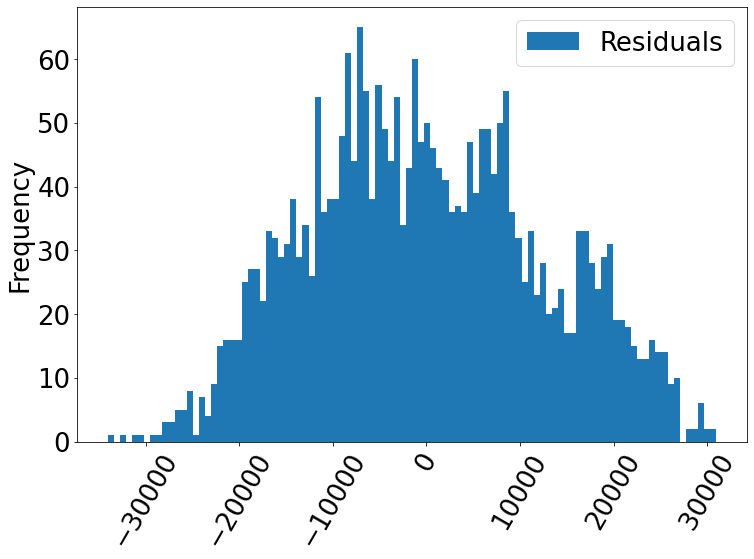

In [14]:
import matplotlib.pyplot as plt
plt.rcParams.update({"font.size":26})
fig, ax = plt.subplots(figsize = (12,8))
reg_data[["Residuals"]].plot.hist(bins = 100, ax = ax)
plt.xticks(rotation=60)

The residuals are leaning right tailed now compared to the earlier bar graph becasue the logged values are growing at a slightly increasing rates, but earlier the actual values were increasing and cecreasing in values evenly.

In [15]:
y_name = y_var[0]
y_hat = reg_data2[y_name + " Predictor"]
y_mean = reg_data2[y_name].mean()
y = reg_data2[y_name]

In [16]:
reg_data2["Residuals"] = y_hat.sub(y_mean)

## RGDP Per Capita vs Predictor

<AxesSubplot:xlabel='RGDP Per Capita', ylabel='RGDP Per Capita Predictor'>

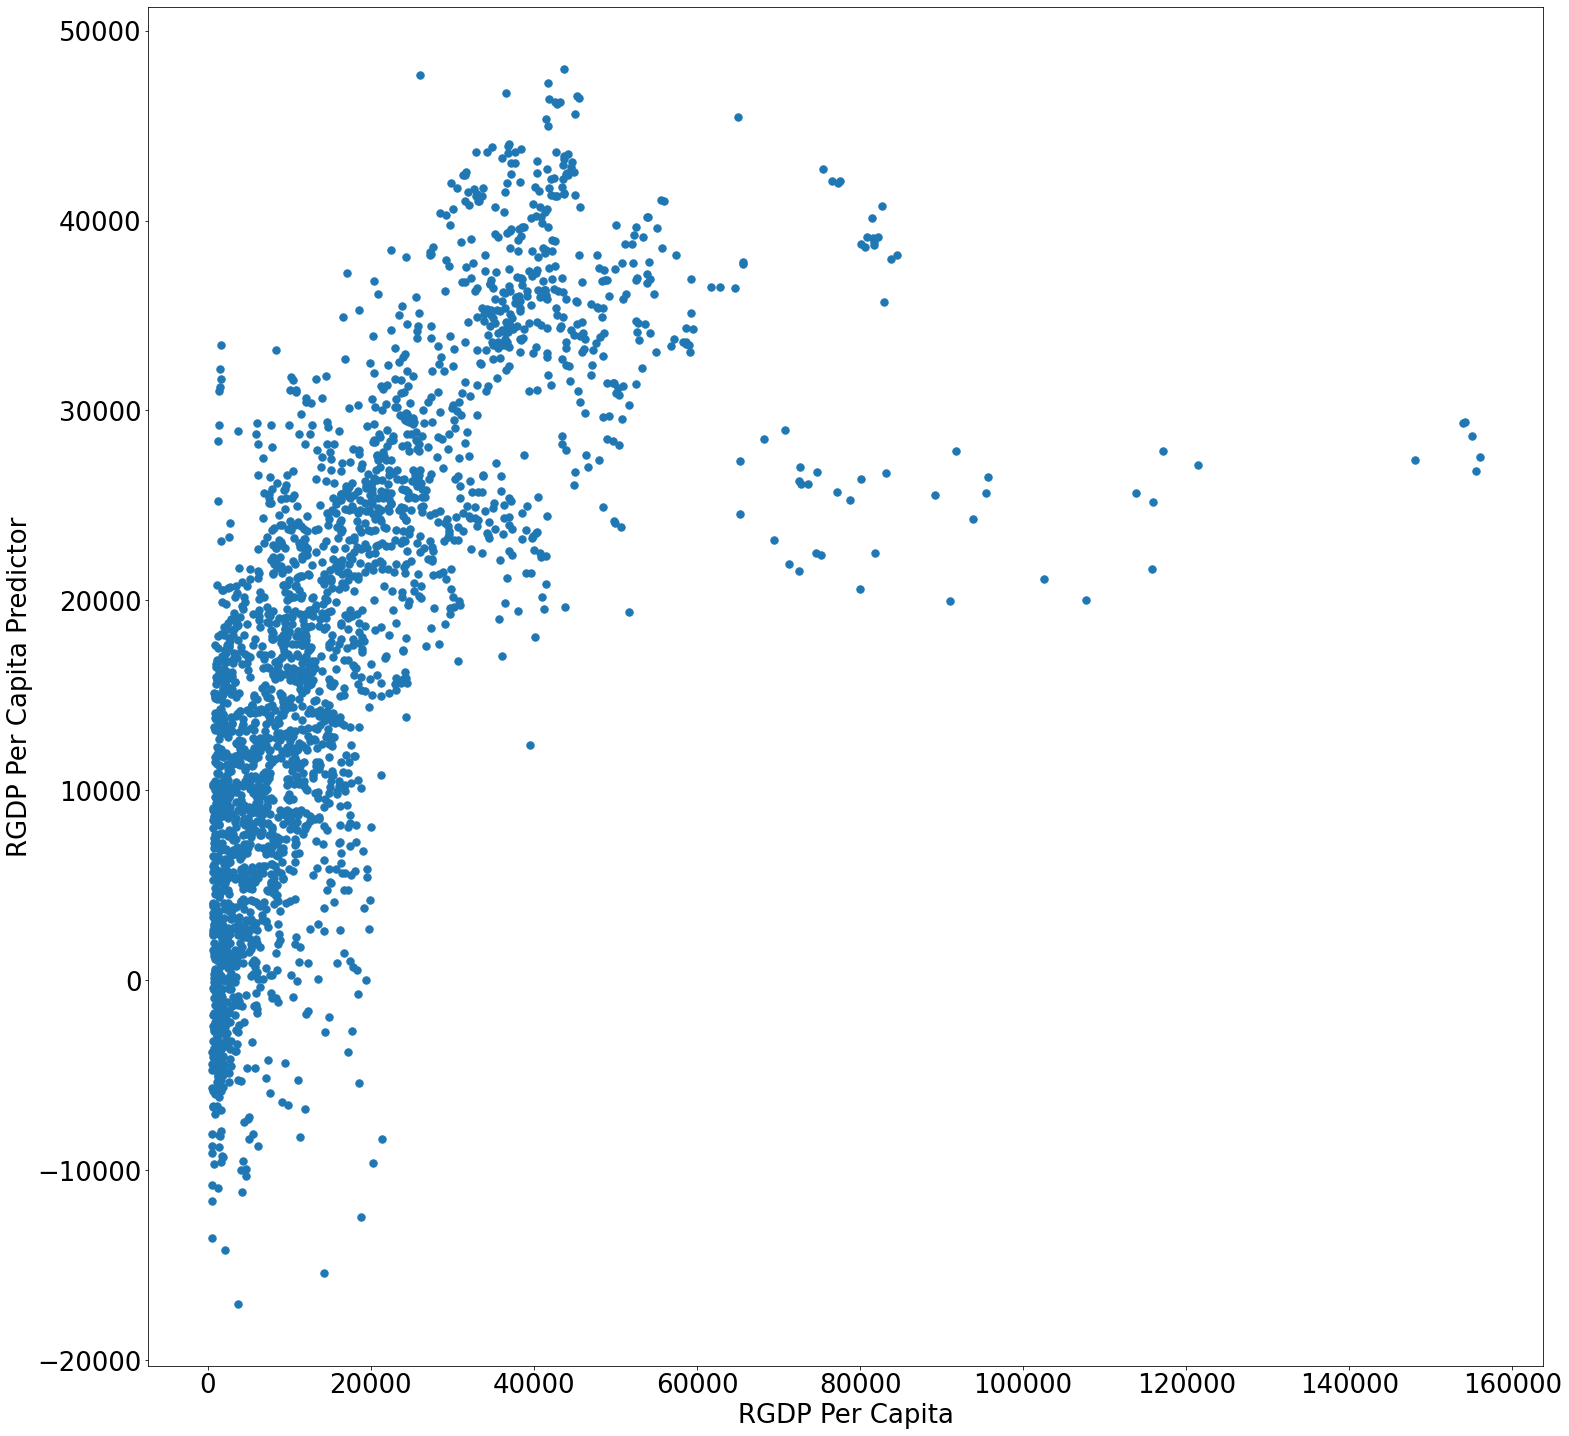

In [35]:
from datlib.plots import *

reg_data2.plot.scatter(x = "RGDP Per Capita",
                       y = "RGDP Per Capita Predictor",
                       figsize = (25,25),
                       s = (55))

## RGDP Per Capita vs Predictor

<AxesSubplot:xlabel='RGDP Per Capita', ylabel='Residuals'>

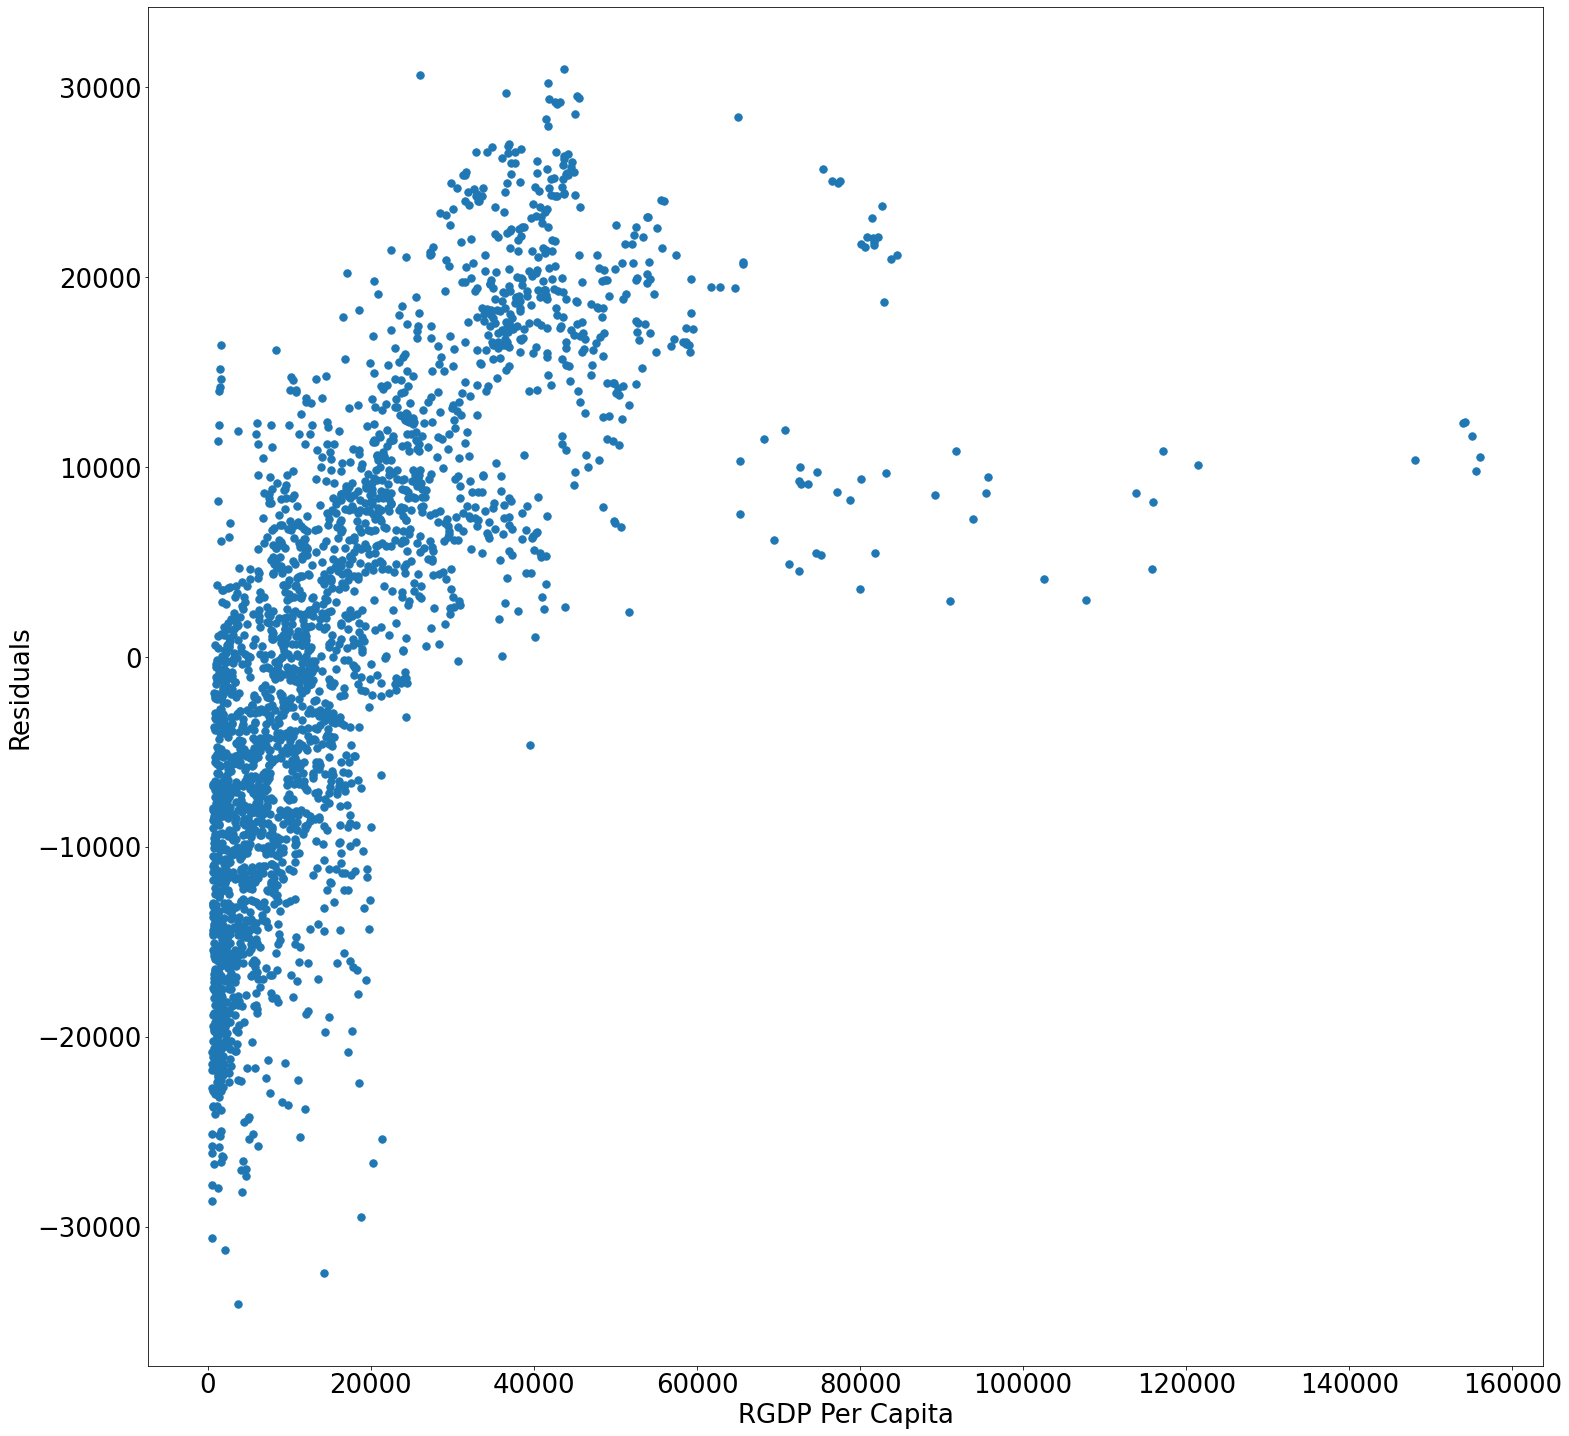

In [36]:
reg_data2.plot.scatter(x = "RGDP Per Capita",
                       y = "Residuals",
                       figsize = (25,25),
                       s = (55))

The residuals are not normally distributed. Normal distribution would have a slope of 1 and the graph above have a very large slope as the graph is upward sloping. The residuals, which is the distance from the data point and the regression line, are changing in a way that the error is not consistent across the model.

KeyError: 'BHS'

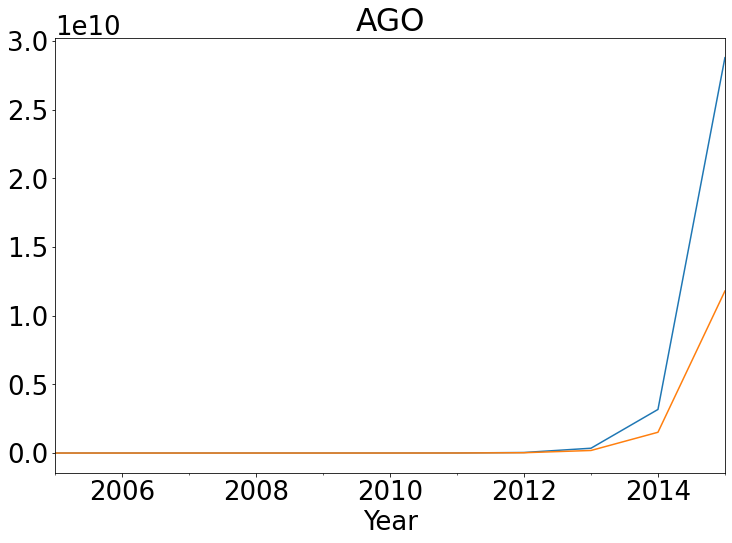

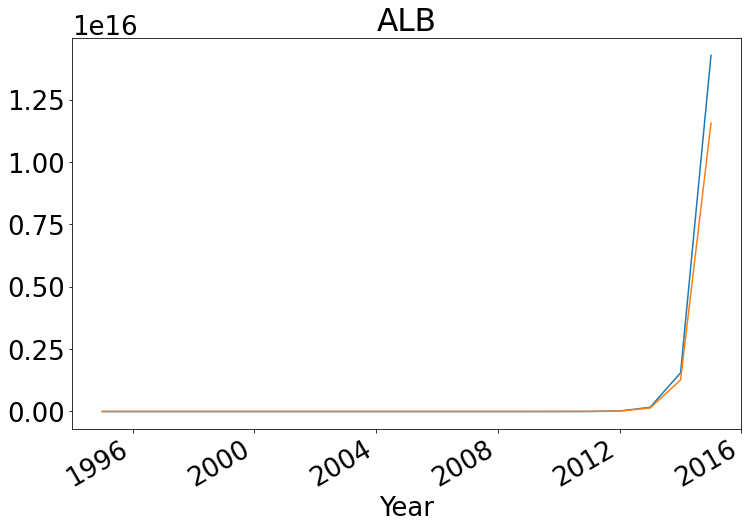

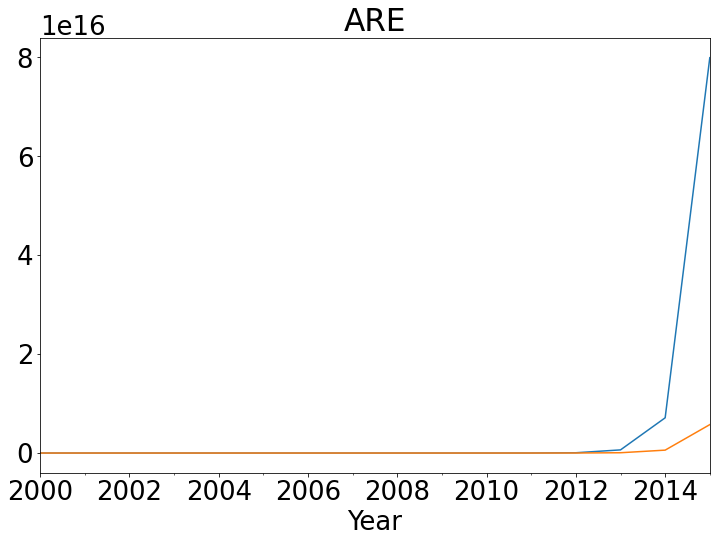

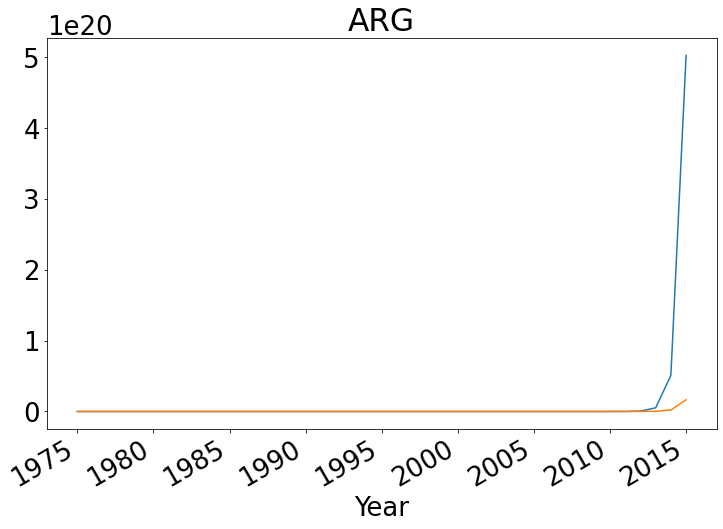

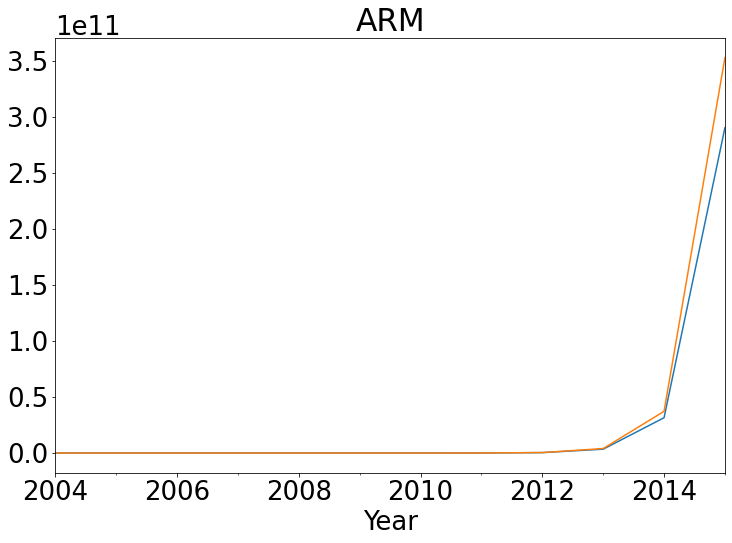

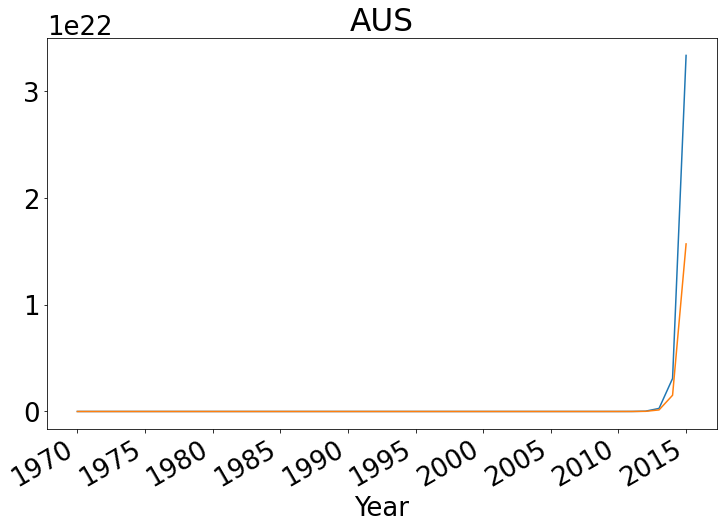

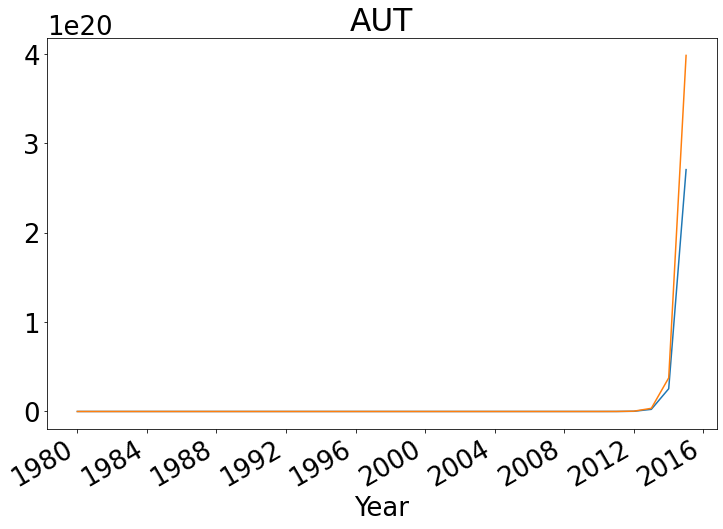

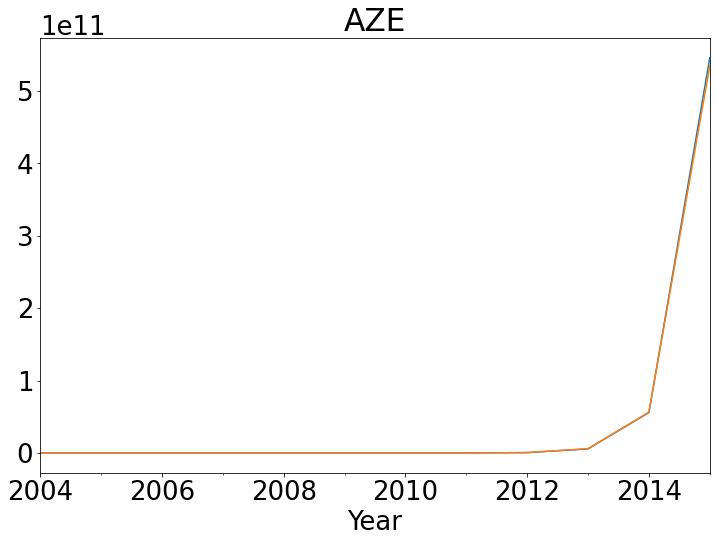

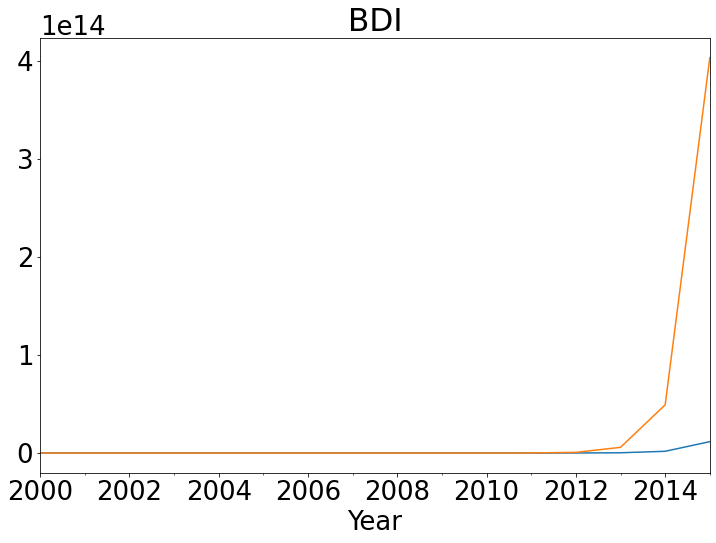

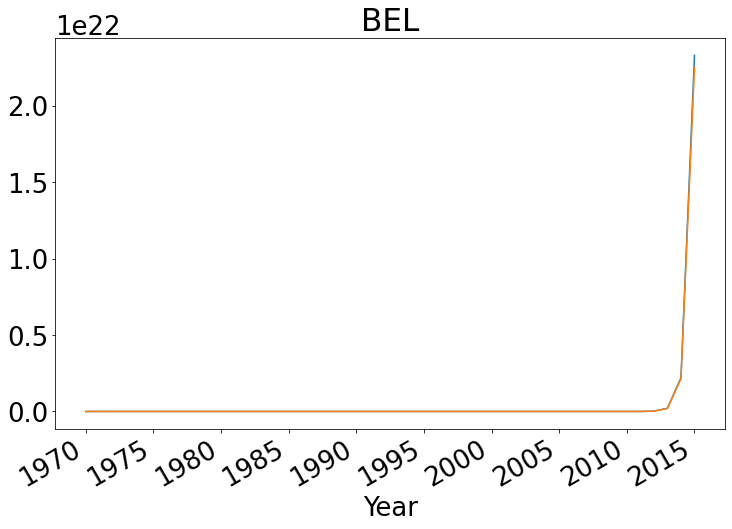

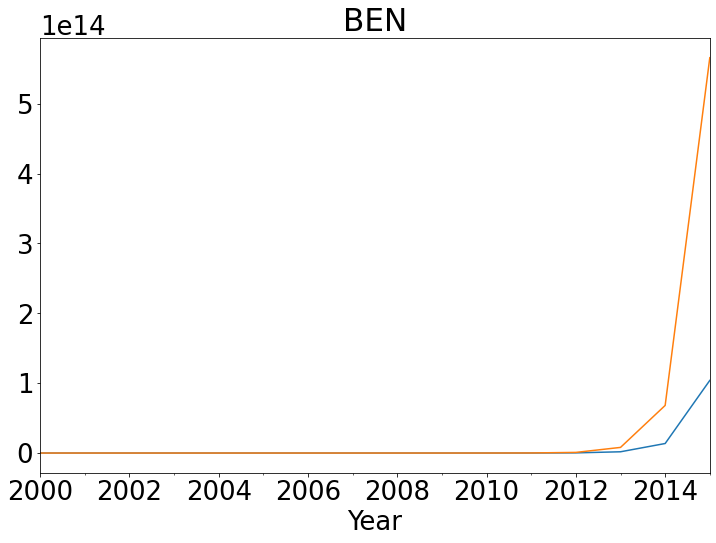

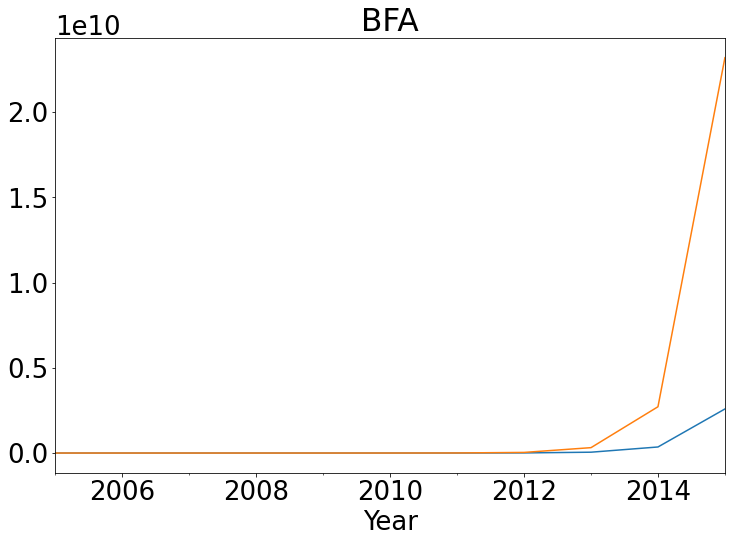

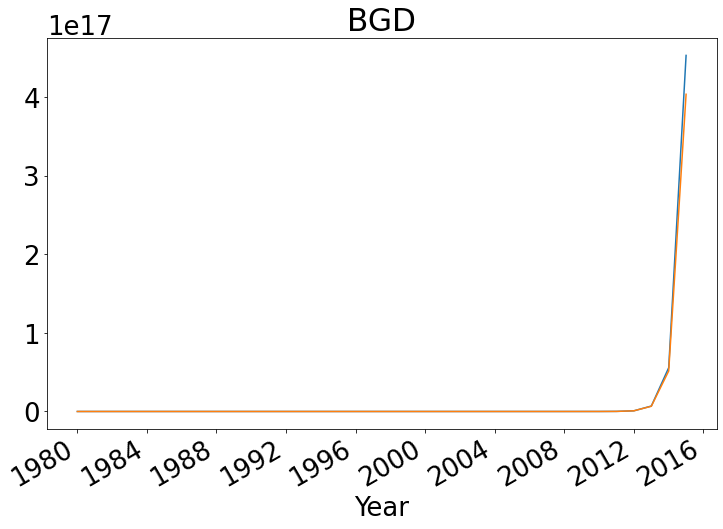

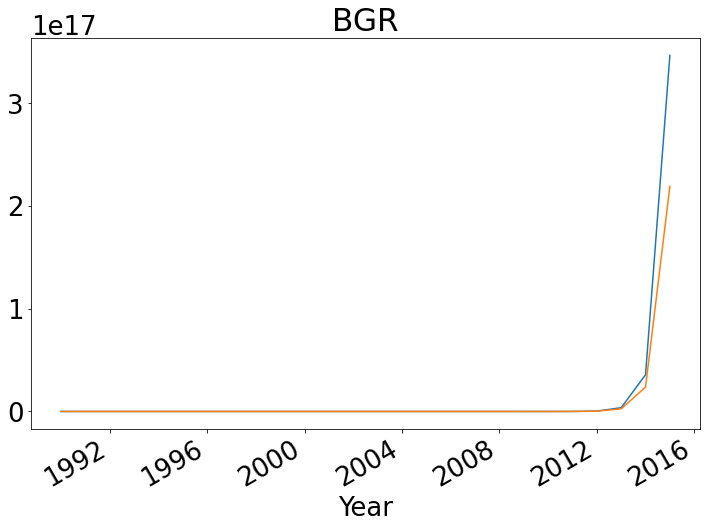

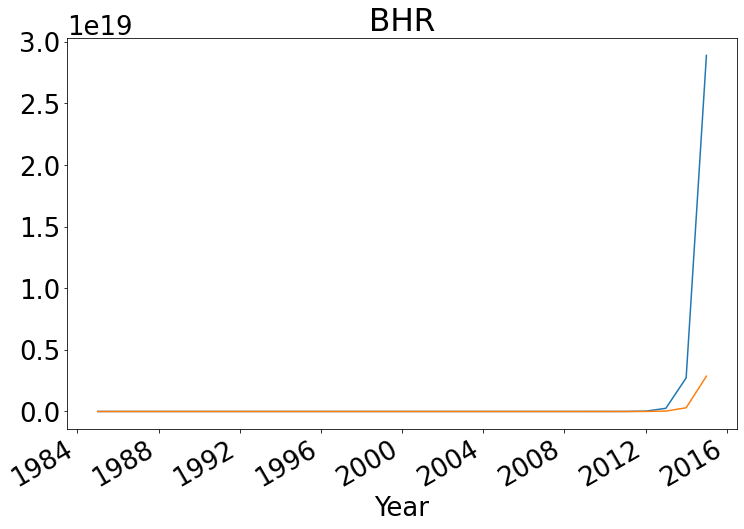

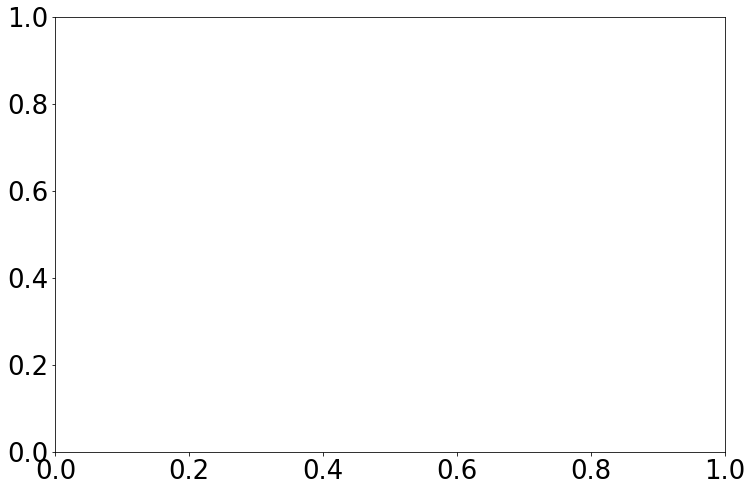

In [47]:
for country in countries:
    fig, ax = plt.subplots(figsize = (12,8))

    reg_data[["RGDP Per Capita (log)"] + ["RGDP Per Capita (log) Predictor"]].loc[country].cumprod().plot.line(ax = ax, legend = False)
    
    ax.set_title(country)
    plt.plot()

In [43]:
reg_data

RGDP Per Capita (log)  Size of Government  \
ISO_Code Year                                                    
AGO      2005-01-01               8.544030            4.652865   
         2006-01-01               8.703507            5.342913   
         2007-01-01               8.878079            5.239228   
         2008-01-01               8.979165            5.307379   
         2009-01-01               8.974618            7.104953   
...                                    ...                 ...   
ZWE      2011-01-01               7.323171            6.424630   
         2012-01-01               7.380256            6.670469   
         2013-01-01               7.380256            6.325105   
         2014-01-01               7.374002            6.433165   
         2015-01-01               7.352441            6.402772   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
AGO      2005-01-01                        3.148805     1.262168   
         2006-01-01                        3.546463     4.061198   
         2007-01-01                        3.569182     4.453327   
         2008-01-01                        3.654098     5.032836   
         2009-01-01                        3.622792     5.238259   
...                                             ...          ...   
ZWE      2011-01-01                        3.943725     4.109198   
         2012-01-01                        4.013004     5.378742   
         2013-01-01                        3.575827     6.895530   
         2014-01-01                        3.615584     7.966798   
         2015-01-01                        3.820360     8.180178   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
AGO      2005-01-01                          6.218266    4.729310   
         2006-01-01                          6.158949    5.306135   
         2007-01-01                          6.115462    5.524626   
         2008-01-01                          5.687976    5.221726   
         2009-01-01                          5.811844    5.011598   
...                                               ...         ...   
ZWE      2011-01-01                          5.366773    4.372878   
         2012-01-01                          5.132305    3.661438   
         2013-01-01                          5.589087    3.848068   
         2014-01-01                          5.909121    3.987721   
         2015-01-01                          5.679719    6.643620   

                     RGDP Per Capita (log) Predictor     Residuals  
ISO_Code Year                                                       
AGO      2005-01-01                         8.139961 -14410.565193  
         2006-01-01                         8.336461 -11411.268245  
         2007-01-01                         8.389497 -10221.871083  
         2008-01-01                         8.354668 -10908.851387  
         2009-01-01                         8.041702 -16723.672217  
...                                              ...           ...  
ZWE      2011-01-01                         8.103976 -16070.019142  
         2012-01-01                         8.084995 -17774.778291  
         2013-01-01                         8.170802 -16804.244147  
         2014-01-01                         8.288685 -15550.533285  
         2015-01-01                         8.467497  -7713.079180  

[2579 rows x 8 columns]